<a href="https://colab.research.google.com/github/suelen-prs/EBAC/blob/main/mod_18_exercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [6]:

# Agrupando por 'sex' e calculando as estatísticas
grouped = df.groupby('sex')['flag_doente']
saudaveis = grouped.apply(lambda x: (x==0).sum()).rename('saudaveis')
doentes = grouped.apply(lambda x: (x==1).sum()).rename('doentes')
total = grouped.count().rename('total')
media_doentes = (doentes / total).rename('media_doentes')
odds = (doentes / saudaveis).rename('odds')

# Calculando Odds Ratio usando total como referência
total_doentes = df['flag_doente'].sum()
total_saudaveis = len(df) - total_doentes
odds_ratio = odds / (total_doentes / total_saudaveis)

# Calculando Logit (LOG(Odds)) e WOE (LOG(Odds Ratio))
logit = np.log(odds).rename('logit')
woe = np.log(odds_ratio).rename('woe')

# Montando a tabela final com as estatísticas
bivariate_analysis = pd.concat([saudaveis, doentes, total, media_doentes, odds, odds_ratio, logit, woe], axis=1)
bivariate_analysis.reset_index()

,sex,saudaveis,doentes,total,media_doentes,odds,odds,logit,woe
0,0.0,72,25,97,0.257732,0.347222,0.409672,-1.05779,-0.892398
1,1.0,92,114,206,0.553398,1.239130,1.461996,0.21441,0.379802


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [7]:
# Categorizando a variável 'age' em 5 grupos
df['age_group'] = pd.cut(df['age'], bins=5, labels=['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5'])

# Agrupando por 'age_group' e calculando as estatísticas
grouped = df.groupby('age_group')['flag_doente']
saudaveis = grouped.apply(lambda x: (x==0).sum()).rename('saudaveis')
doentes = grouped.apply(lambda x: (x==1).sum()).rename('doentes')
total = grouped.count().rename('total')
media_doentes = (doentes / total).rename('media_doentes')
odds = (doentes / saudaveis).rename('odds')

# Calculando Odds Ratio usando total como referência
total_doentes = df['flag_doente'].sum()
total_saudaveis = len(df) - total_doentes
odds_ratio = odds / (total_doentes / total_saudaveis)

# Calculando Logit (LOG(Odds)) e WOE (LOG(Odds Ratio))
logit = np.log(odds.replace(0, np.nan)).rename('logit')  # Evita divisão por zero
woe = np.log(odds_ratio.replace(0, np.nan)).rename('woe')  # Evita divisão por zero

# Calculando a média de idade para cada grupo
media_idade = df.groupby('age_group')['age'].mean().rename('media_idade')

# Montando a tabela final com as estatísticas
bivariate_analysis_age = pd.concat([saudaveis, doentes, total, media_doentes, odds, odds_ratio, logit, woe, media_idade], axis=1)
bivariate_analysis_age.reset_index()


,age_group,saudaveis,doentes,total,media_doentes,odds,odds,logit,woe,media_idade
0,Grupo 1,8,3,11,0.272727,0.375000,0.442446,-0.980829,-0.815437,35.181818
1,Grupo 2,50,21,71,0.295775,0.420000,0.495540,-0.867501,-0.702108,43.704225
2,Grupo 3,56,41,97,0.422680,0.732143,0.863823,-0.311780,-0.146387,53.567010
3,Grupo 4,40,67,107,0.626168,1.675000,1.976259,0.515813,0.681206,61.775701
4,Grupo 5,10,7,17,0.411765,0.700000,0.825899,-0.356675,-0.191282,70.529412


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

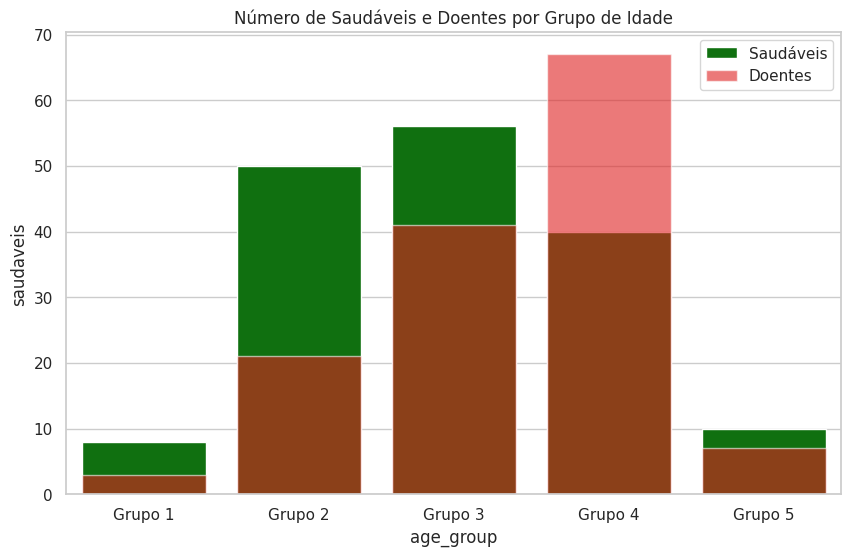

In [12]:
# Agrupando e calculando as estatísticas necessárias
grouped_age = df.groupby('age_group')['flag_doente']
saudaveis_age = grouped_age.apply(lambda x: (x==0).sum()).rename('saudaveis')
doentes_age = grouped_age.apply(lambda x: (x==1).sum()).rename('doentes')

# Juntando os dados em um único DataFrame
plot_data_simplified = pd.concat([saudaveis_age, doentes_age], axis=1).reset_index()

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))

# Barras para saudáveis
sns.barplot(x='age_group', y='saudaveis', data=plot_data_simplified, color='green', label='Saudáveis')

# Barras para doentes
sns.barplot(x='age_group', y='doentes', data=plot_data_simplified, color='red', alpha=0.6, label='Doentes')

# Adicionando título e legenda
plt.title('Número de Saudáveis e Doentes por Grupo de Idade')
plt.legend()

# Mostrando o gráfico
plt.show()
